In [65]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import stats

In [66]:
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [67]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Now, want to visualize things in a way that provide a clear distinction between the species of iris

Strategies:

- Using length and width of only petals? 
    - Possibly combine to represent the area of the petal?
    - Rectangular area, triangular, ellipse, etc.?
- How about sepal "size" ratio with petal "size"

In [70]:
lengths = iris[['petal_length', 'class']]

In [71]:
lengths

,petal_length,class
0,1.4,Iris-setosa
1,1.4,Iris-setosa
2,1.3,Iris-setosa
3,1.5,Iris-setosa
4,1.4,Iris-setosa
...,...,...
145,5.2,Iris-virginica
146,5.0,Iris-virginica
147,5.2,Iris-virginica
148,5.4,Iris-virginica


In [72]:
iris.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [73]:
iris.groupby('class').std()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [74]:
iris.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [75]:
iris.groupby('class').mean().transpose()

class,Iris-setosa,Iris-versicolor,Iris-virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.418,2.770,2.974
petal_length,1.464,4.260,5.552
petal_width,0.244,1.326,2.026


Text(0, 0.5, 'centimeters')

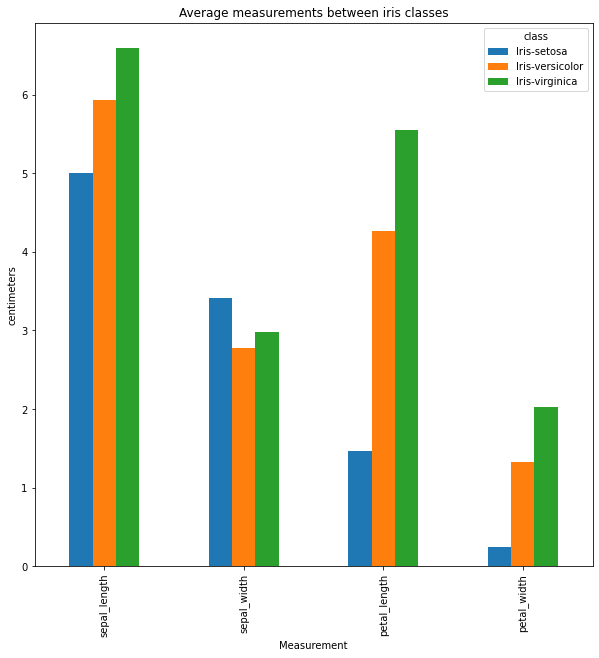

In [76]:
iris.groupby('class').mean().transpose().plot.bar(figsize=(10,10))
plt.title('Average measurements between iris classes')
plt.xlabel('Measurement')
plt.ylabel('centimeters') # important to realize the units are all the same!

In [77]:
# going with "size" meaning rectangular area...

iris['sepal_rectangular_area'] = iris['sepal_length'].values * iris['sepal_width'].values
iris['petal_rectangular_area'] = iris['petal_length'].values * iris['petal_width'].values

In [78]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_rectangular_area,petal_rectangular_area
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,20.10,11.96
146,6.3,2.5,5.0,1.9,Iris-virginica,15.75,9.50
147,6.5,3.0,5.2,2.0,Iris-virginica,19.50,10.40
148,6.2,3.4,5.4,2.3,Iris-virginica,21.08,12.42


In [79]:
iris['sepal_petal_area_ratio'] = \
    iris['sepal_rectangular_area'].values / iris['petal_rectangular_area'].values

In [80]:
iris[['class', 'sepal_petal_area_ratio']].groupby('class').mean()

,sepal_petal_area_ratio
class,
Iris-setosa,57.443120
Iris-versicolor,2.970577
Iris-virginica,1.765114


In [81]:
iris[['class', 'sepal_petal_area_ratio']].groupby('class').std()

,sepal_petal_area_ratio
class,
Iris-setosa,26.049647
Iris-versicolor,0.478105
Iris-virginica,0.248194


In [82]:
setosa = iris['sepal_petal_area_ratio'][iris['class'] == 'Iris-setosa'].values

In [83]:
stats.mean(setosa)

57.443120131932055

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

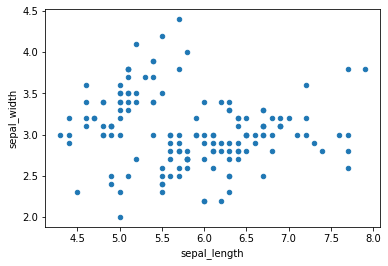

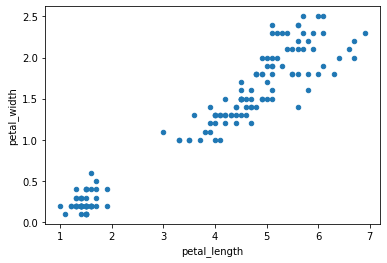

In [84]:
iris.plot.scatter(x='sepal_length', y='sepal_width')
iris.plot.scatter(x='petal_length', y='petal_width')

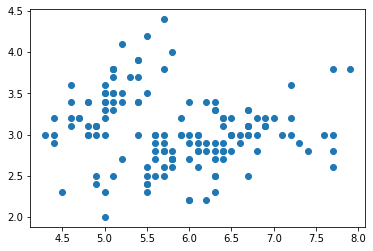

In [85]:
plt.scatter(x=iris['sepal_length'], y=iris['sepal_width'])

Text(0.5, 1.0, 'Sepal length vs width')

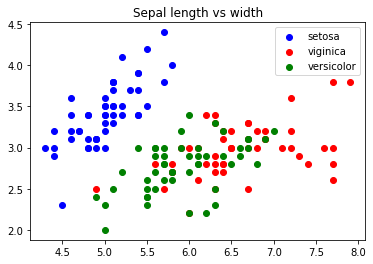

In [86]:
# But now, separate by class
setosa = iris[iris['class'] == 'Iris-setosa']
virginica = iris[iris['class'] == 'Iris-virginica']
versicolor = iris[iris['class'] == 'Iris-versicolor']

plt.scatter(x=setosa['sepal_length'], y=setosa['sepal_width'], color='b')
plt.scatter(x=virginica['sepal_length'], y=virginica['sepal_width'], color='r')
plt.scatter(x=versicolor['sepal_length'], y=versicolor['sepal_width'], color='g')
plt.legend(['setosa', 'viginica', 'versicolor'])
plt.title("Sepal length vs width")

In [87]:
stats.var(setosa['sepal_length'])

AttributeError: module 'stats' has no attribute 'var'